<img src='./fig/vertical_COMILLAS_COLOR.jpg' style= 'width:70mm'>
<h1 style='font-family: Optima;color:#ecac00'>
Máster en Big Data. Tecnología y Analítica Avanzada (MBD).
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
Fundamentos Matemáticos del Análisis de Datos (FMAD). 2022-2023.
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
Final Course Project
<a class="tocSkip">    
</h1>  

# Names
+ Enrique Gil García
+ Agustín Rodríguez Agudo
+ Diego Sanz-Gadea Sánchez
+ Ignacio López Soto
+ Ana Bai Maroto Domínguez

# Main Goal of the Project
The main goal of this project is to give you the opportunity to showcase the Exploratory Data Analysis (EDA) and Python skills that you have been practicing in this course. That is, you should select a rich enough data set so that you can use it to (at least) do the following:
- Describe and visualize all common types of variables (qualitative, discrete, continuous).
- In particular make sure that you include a rich set of graphs, covering all the standard types of graphs (bar plots, histograms, density curves, bar plots, scatter plots to name the most relevant). Bot remember: do not include a graph without including a comment about the information it provides!
- Make some inference about the variables in the data set: get some confidence intervals, test hypothesis, etc.
- Analyze the possible relations between variables in you data. The kind of analysis we look for is exploratory or based in elementary linear or logistic models. There is no need for more complicated modeling, you will have plenty of that in Machine Learning.
- Some amount of Data Wrangling (dealing with missing data, outliers, untidy data sets, etc.) is highly encouraged and will be taken into account for grading, but keep in mind that it is easy to get lost in this! Keep it under control and talk to us when in doubt.

# Description of the Project
In this project, we aim to permorm an an analysis on the 50 best-selling novels on Amazon between the years 2009 and 2021.

# Libraries

In [30]:
# Standard Data Science Libraries Import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scp
import seaborn as sns
import scipy.stats as stats

import statsmodels.api as sm 
import statsmodels.formula.api as smf

#sns.set(rc={'figure.figsize':(12, 8.5)})
sns.set()

# Exploratory Data Analysis

## Basic Information

In [31]:
books = pd.read_csv('data/Amazon Top 50 Books 2009-2021 - Reworked Sheet (1).csv', sep=",", header=0)

In [32]:
books.head()

Name              Author  User Rating  \
0            10-Day Green Smoothie Cleanse            JJ Smith          4.7   
1                        11/22/63: A Novel        Stephen King          4.6   
2  12 Rules for Life: An Antidote to Chaos  Jordan B. Peterson          4.7   
3                                     1984       George Orwell          4.7   
4                   1984 (Signet Classics)       George Orwell          4.7   

  Reviews   Price Price_r  Year        Genre  
0  17,350   $8.00      $8  2016  Non Fiction  
1   2,052  $22.00     $22  2011      Fiction  
2  18,979  $15.00     $15  2018  Non Fiction  
3  70,425   $7.48      $8  2021      Fiction  
4  21,424   $6.00      $6  2017      Fiction

The dataset contains 8 variables, of which 3 are **qualitative** (*Name*, *Author*, *Genre*) and 5 are **quantitative** (*User Rating*, *Reviews*, *Price*, *Price_r*, *Year*). 

Among the quantitative variables, *Rating* and *Price* are **continuous** and *Year*, *Reviews* and *Price_r* are **discrete**. As can be seen, *Price_r* is a variable obtained by rounding the value of the price variable so it is probably closely related to this variable.

In [33]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         650 non-null    object 
 1   Author       650 non-null    object 
 2   User Rating  650 non-null    float64
 3   Reviews      650 non-null    object 
 4   Price        650 non-null    object 
 5   Price_r      650 non-null    object 
 6   Year         650 non-null    int64  
 7   Genre        650 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 40.8+ KB


In [34]:
# Shape of the dataset
print('The shape of the dataset is' , books.shape, '\n')

# Number of observations
print('The number of observations is' , books.shape[0], '\n')

# Number of variables
print('The number of variables is' ,books.shape[1], '\n')

# Variables
print('The variables are: \n', books.columns.to_list(), '\n')

The shape of the dataset is (650, 8) 

The number of observations is 650 

The number of variables is 8 

The variables are: 
 ['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Price_r', 'Year', 'Genre'] 



Through the **info** method, we obtain general information about the dataset
+ We observe that there are **650 rows** and **8 columns**
+ The variables *Reviews, Price* and *Price_r* are of type object, so to analyze the dataset we will have to convert them to **numeric** format as there are quantitative variables.
+ The variables *Name*, *Author* and *Genre* are of type object, so we will have to convert them into **category** type as there are cualitative variables.

## Missing Values

In [35]:
# Check missing data
print("Are there missing values (NaN)?:\n", books.isnull().values.any(), '\n')
print("The variables which have missing values (NaN) are:\n", books.isnull().sum())

Are there missing values (NaN)?:
 False 

The variables which have missing values (NaN) are:
 Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Price_r        0
Year           0
Genre          0
dtype: int64


There are not missing values so we can use all the registers of the original dataset.

## Data Types of Variables

Now, we are going to convert variables *Name*, *Author* and *Genre* to **category**.

Also, we are going to convert continuos quantitative variables into **float64** and discrete quantitative variables into **int64** type.

In [36]:
# Cualitative variables
books.Name = books.Name.astype('category')
books.Author = books.Author.astype('category')
books.Genre = books.Genre.astype('category')

# Quantitative variables
books.Price = books.Price.str.replace("$","").astype('float64')
books.Price_r = books.Price_r.str.replace("$","").astype('int64')

books.Reviews = books.Reviews.str.replace("$","")
books.Reviews = books.Reviews.str.replace(",","")
books.Reviews = books.Reviews.astype('int64')

books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Name         650 non-null    category
 1   Author       650 non-null    category
 2   User Rating  650 non-null    float64 
 3   Reviews      650 non-null    int64   
 4   Price        650 non-null    float64 
 5   Price_r      650 non-null    int64   
 6   Year         650 non-null    int64   
 7   Genre        650 non-null    category
dtypes: category(3), float64(2), int64(3)
memory usage: 58.6 KB


C:\Users\nacho\AppData\Local\Temp\ipykernel_19604\2707463001.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  books.Price = books.Price.str.replace("$","").astype('float64')
C:\Users\nacho\AppData\Local\Temp\ipykernel_19604\2707463001.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  books.Price_r = books.Price_r.str.replace("$","").astype('int64')
C:\Users\nacho\AppData\Local\Temp\ipykernel_19604\2707463001.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  books.Reviews = books.Reviews.str.replace("$","")


## Basic Numeric Summary

### Quantitative Variables

The **describe** method gives us values of count, mean , std, min, max and percentiles from all the quantitative variables of the dataset.

In [37]:
books.describe()

User Rating        Reviews       Price     Price_r         Year
count   650.000000     650.000000  650.000000  650.000000   650.000000
mean      4.635385   17204.853846   12.764169   12.796923  2015.000000
std       0.221517   20715.650579   10.176392   10.168624     3.744539
min       3.300000      37.000000    0.000000    0.000000  2009.000000
25%       4.500000    4789.250000    7.000000    7.000000  2012.000000
50%       4.700000    9957.000000   11.000000   11.000000  2015.000000
75%       4.800000   22359.250000   15.000000   15.000000  2018.000000
max       4.900000  193482.000000  105.000000  105.000000  2021.000000

Regarding the results of this fuction:
+ The mean of **User Rating** is very close to its median (50%), so there probably won't be many outliers. 
+ The mean of **Reviews** is far away from the median (50%), so the outliers affect the variable.
+ The mean and median of **Price** and **Price_r** are almost the same, which is totally logical since these variables have been obtained one through the other.
+ In **Year**, the mean matches with the median, so the distribution of this variable is likely to be very homogeneous.

### Cualitative variables

In order to study the factors of our dataset, we have used frequency tables: relative and absolute frequencies.

Taking into account the information that describes each of the cualitative values, it only makes sense to study the frequency table of Genre and maybe of Author, as there could be more than one books writen by the same person.

In [38]:
# Frequency tables: Genre
AbsFreq_Genre = books['Genre'].value_counts()
print('The absolute frequency table of Genre is:')
AbsFreq_Genre

The absolute frequency table of Genre is:


Non Fiction    363
Fiction        287
Name: Genre, dtype: int64

In [39]:
# Frequency tables: Genre
RelFreq_Genre = books['Genre'].value_counts(normalize=True).sort_index()
print('The relative frequency table of Genre is:')
RelFreq_Genre

The relative frequency table of Genre is:


Fiction        0.441538
Non Fiction    0.558462
Name: Genre, dtype: float64

In [40]:
# Frequency tables: Author
AbsFreq_Author = books['Author'].value_counts()
print('The absolute frequency table of Author is:')
AbsFreq_Author

The absolute frequency table of Author is:


Jeff Kinney                           14
Gary Chapman                          13
Suzanne Collins                       12
Rick Riordan                          11
American Psychological Association    11
                                      ..
Mark Twain                             1
Christopher Paolini                    1
Marty Noble                            1
Mary Ann Shaffer                       1
Michael Wolff                          1
Name: Author, Length: 292, dtype: int64

In [41]:
# Frequency tables: Author
RelFreq_Author = books['Author'].value_counts(normalize=True).sort_index()
print('The relative frequency table of Author is:')
RelFreq_Author

The relative frequency table of Author is:


Abraham Verghese      0.003077
Adam Gasiewski        0.001538
Adam Mansbach         0.001538
Adam Silvera          0.001538
Adam Wallace          0.004615
                        ...   
William P. Young      0.003077
Wizards RPG Team      0.004615
Wonder House Books    0.001538
Workman Publishing    0.004615
Zhi Gang Sha          0.003077
Name: Author, Length: 292, dtype: float64

# Price Analysis

In [42]:
#Generó los DataFrames que quiero gráficar
mean_books_price_by_year=books.groupby("Year").mean()["Price"]
mean_books_price_by_genre=books.groupby("Genre").mean()["Price"]
mean_books_price_by_genre_per_year=books.groupby(["Year","Genre"]).mean()["Price"]
mean_books_price_by_userrating=books.groupby("User Rating").mean()["Price"]
user_rating_percent=books["User Rating"].value_counts(normalize=True).sort_index()


fig, axs = plt.subplots(2,3,figsize=(15,10)) #Esto sirve para generar las plots agrupadas

#Grafica (0,0)
mean_books_price_by_year.plot.line(title="Mean Price Books Per Year", ylabel="$", xlabel="Year",grid=True,ax=axs[0,0])
axs[0,0].scatter(x=mean_books_price_by_year.idxmin(),y=mean_books_price_by_year.min()) #Indico un punto en la grafica
axs[0,0].text(x=mean_books_price_by_year.idxmin()+0.1,y=mean_books_price_by_year.min(), s=f'min {mean_books_price_by_year.idxmin()}') #Escribo un texto en la gráfica
# Grafica (0,1)
#user_rating_percent.plot.bar(title="User Rating", ylabel="%", xlabel="Rating",ax=axs[0,1],grid=True)
sns.boxplot(y=books.Price, ax=axs[0,1])
sns.stripplot(y=books.Price, ax=axs[0,1], alpha=0.3,color='grey')
#Gráfica (0,2)
mean_books_price_by_userrating.plot.bar(title="Mean Price By Rating", ylabel="$", xlabel="Rating",ax=axs[0,2],grid=True)
#Gráfica (1,0)
mean_books_price_by_genre.plot.bar(title="Mean Price By Genre", ylabel="$", xlabel="Genre",ax=axs[1,0],grid=True)
#Gráfica (1,1)
mean_books_price_by_genre_per_year.unstack().plot.bar(title="Mean Price By Genre per Year", ylabel="$", xlabel="Year",ax=axs[1,1],grid=True)
sns.histplot(books.Price, ax=axs[1,2], kde=True)

<AxesSubplot:xlabel='Price', ylabel='Count'>

+ From the first graph we can tell that older books tend to be more expensive than more recent ones. The year 2019 stands out for having the lowest average price for books, which is close to $10.

+ The second graph shows the distribution of the price of books. The boxplot indicates that most prices sit lower than $30. The most expensive book costs more than 100 dollars.

+ From the third plot we can see the average price for books grouped by rating. It is interesting to see that the highest rated books (4.9) are the cheapest. It is also surprising that books with 3.6 rating are that expensive, around $18. The reason behind that could be that people that review the books take price highly into consideration. 

+ The bottom left graph plots the average price for fiction and non-fiction books. Non-fiction books seem to be more expensive.

+ In the fifth graph (middle bottom) we can se that non fiction books are consistently more expensive than fiction books year after year. The only exception is 2009, where both genres have a similar price.

+ In the last graph (bottom right) we can see that most books are priced around $10. the dirtribution of the prices is centered at this value is right skewed because of outlier prices.

# Reviews Analysis

In [43]:
sum_reviews_by_genre=books.groupby("Genre").sum()["Reviews"]
mean_reviews_by_genre=books.groupby("Genre").mean()["Reviews"]

mean_reviews_per_year=books.groupby(["Year"]).mean()["Reviews"]

sum_reviews_and_genre_per_year=books.groupby(["Year","Genre"]).sum()["Reviews"]
mean_reviews_and_genre_per_year=books.groupby(["Year","Genre"]).mean()["Reviews"]

sum_reviews_by_user_rating=books.groupby(["User Rating","Genre"]).sum()["Reviews"]
mean_reviews_by_user_rating=books.groupby(["User Rating","Genre"]).mean()["Reviews"]

In [44]:
fig, axs = plt.subplots(2,3,figsize=(15,10)) #Esto sirve para generar las plots agrupadas

#Grafica (0,0)
mean_reviews_by_genre.plot.bar(title="Mean Reviews by Genre 2009-2021", ylabel="Reviews", xlabel="Genre",grid=True,ax=axs[0,0])

# Grafica (0,1)
#user_rating_percent.plot.bar(title="User Rating", ylabel="%", xlabel="Rating",ax=axs[0,1],grid=True)
sns.boxplot(y=books.Reviews, ax=axs[0,1])
sns.stripplot(y=books.Reviews, ax=axs[0,1], alpha=0.3,color='grey')
#Gráfica (0,2)
mean_reviews_by_user_rating.unstack().plot.bar(title="Mean Reviews By User Rating", ylabel="Reviews", xlabel="User Rating",ax=axs[0,2],grid=True)
#Gráfica (1,0)
mean_reviews_and_genre_per_year.unstack().plot.bar(title="Mean Reviews per Year", ylabel="Reviews", xlabel="Year",ax=axs[1,0],grid=True)
#Gráfica (1,1)
mean_reviews_per_year.plot.line(title="Mean Reviews By Year", ylabel="Reviews", xlabel="Year",ax=axs[1,1],grid=True)
sns.histplot(books.Reviews, ax=axs[1,2], kde=True)
fig.tight_layout()

Regarding the **Reviews** variable, we can extract from the graphs:
+ The average rating is higher for fiction
+ The typical number of reviews is under 25,000
+ The highest rated books have more reviews if they are Non fiction than otherwise.
+ The number of reviews has grown substantially over the years.
+ Over the years the number of reviews has increased, especially after 2019 where the growth is outstanding.
+ The number of ratings is right-skewed.

# Name Analysis

## Top 3 books by User Rating and Reviews
- In order of priority, firstly rating and then ordered by number of reviews:

In [45]:
books.sort_values(["User Rating","Reviews",],ascending=False).head(3)

Name           Author  User Rating  \
13                            A Promised Land     Barack Obama          4.9   
214           I Love You to the Moon and Back  Amelia Hepworth          4.9   
420  The Boy, the Mole, the Fox and the Horse  Charlie Mackesy          4.9   

     Reviews  Price  Price_r  Year        Genre  
13     83212  23.00       23  2020  Non Fiction  
214    58200   4.31        5  2021      Fiction  
420    53549  15.00       15  2020  Non Fiction

+ By year:

In [46]:
books.sort_values(["User Rating","Reviews"],ascending=False).drop_duplicates(subset="Year").sort_values(["Year"])

Name             Author  \
477                                           The Help   Kathryn Stockett   
608  Unbroken: A World War II Story of Survival, Re...  Laura Hillenbrand   
228  Jesus Calling: Enjoying Peace in His Presence ...        Sarah Young   
294                          Oh, the Places You'll Go!          Dr. Seuss   
295                          Oh, the Places You'll Go!          Dr. Seuss   
296                          Oh, the Places You'll Go!          Dr. Seuss   
297                          Oh, the Places You'll Go!          Dr. Seuss   
298                          Oh, the Places You'll Go!          Dr. Seuss   
299                          Oh, the Places You'll Go!          Dr. Seuss   
300                          Oh, the Places You'll Go!          Dr. Seuss   
301                          Oh, the Places You'll Go!          Dr. Seuss   
13                                     A Promised Land       Barack Obama   
214                    I Love You to the Moon and Back    Amelia Hepworth   

     User Rating  Reviews  Price  Price_r  Year        Genre  
477          4.8    13871   6.00        6  2009      Fiction  
608          4.8    29673  16.00       16  2010  Non Fiction  
228          4.9    19576   8.00        8  2011  Non Fiction  
294          4.9    21834   8.00        8  2012      Fiction  
295          4.9    21834   8.00        8  2013      Fiction  
296          4.9    21834   8.00        8  2014      Fiction  
297          4.9    21834   8.00        8  2015      Fiction  
298          4.9    21834   8.00        8  2016      Fiction  
299          4.9    21834   8.00        8  2017      Fiction  
300          4.9    21834   8.00        8  2018      Fiction  
301          4.9    21834   8.00        8  2019      Fiction  
13           4.9    83212  23.00       23  2020  Non Fiction  
214          4.9    58200   4.31        5  2021      Fiction

## Top 3 more expensive books

In [47]:
books.sort_values(["Price"],ascending=False).head(3)

Name  \
87   Diagnostic and Statistical Manual of Mental Di...   
88   Diagnostic and Statistical Manual of Mental Di...   
559                       The Twilight Saga Collection   

                               Author  User Rating  Reviews  Price  Price_r  \
87   American Psychiatric Association          4.5     6679  105.0      105   
88   American Psychiatric Association          4.5     6679  105.0      105   
559                   Stephenie Meyer          4.7     3801   82.0       82   

     Year        Genre  
87   2013  Non Fiction  
88   2014  Non Fiction  
559  2009      Fiction

## Top 3 more cheap books

In [48]:
books.sort_values(["Price"],ascending=False).tail(3)

Name          Author  User Rating  Reviews  Price  \
599  To Kill a Mockingbird      Harper Lee          4.8    26234    0.0   
600  To Kill a Mockingbird      Harper Lee          4.8    26234    0.0   
260      Little Blue Truck  Alice Schertle          4.9     1884    0.0   

     Price_r  Year    Genre  
599        0  2015  Fiction  
600        0  2016  Fiction  
260        0  2014  Fiction

# Author Analysis

## Most frequent authors (2009-2021)

In [49]:
books.Author.value_counts()

Jeff Kinney                           14
Gary Chapman                          13
Suzanne Collins                       12
Rick Riordan                          11
American Psychological Association    11
                                      ..
Mark Twain                             1
Christopher Paolini                    1
Marty Noble                            1
Mary Ann Shaffer                       1
Michael Wolff                          1
Name: Author, Length: 292, dtype: int64

## Authors with the most books written (2009-2021)

Since some authors republish their books in different years.

In [50]:
books.drop_duplicates(subset="Name").Author.value_counts()

Jeff Kinney           14
Rick Riordan          10
Stephenie Meyer        8
Dav Pilkey             8
J.K. Rowling           6
                      ..
Gayle Forman           1
Geneen Roth            1
George R.R. Martin     1
George W. Bush         1
Jennifer Smith         1
Name: Author, Length: 292, dtype: int64

# **3 Author assessment criteria** are assigned below for the period (2009-2021)

- Overall Rating
- Overall Rating2
- Overall Rating3


## Best Authors (2009-2021) given by **"Average book rating" * "Average %reviews" * "% Appearances"**

- The percentage of appearances could be replaced by the number of books written by author. (These are different terms). But the number of appearances is chosen, since it is possible for a book to be in the Top 50 for several years

In [53]:
replacers={"Fiction":1,"Non Fiction":0} #Se sustituye los generos por valores bianrios
books["Genre2"]=books.Genre.replace(replacers).astype(int) #genero una columna genre2 que posteriormente sera tratada
df2=books.groupby("Author").mean().sort_values(["User Rating", "Reviews"],ascending=False)
df2["Count"]=books.Author.value_counts() #Cuenta de las aparaciones de autores entre 2009-2021
df2["Normalize Count"]= books.Author.value_counts(normalize=True) #Normalización de las apariciones
df2["Normalize Reviews"]=df2.Reviews.apply(lambda x: x/df2.Reviews.sum()) #Normalización de las reviews
df2["Overall Rating"]= df2["Count"]*df2["Normalize Reviews"]*df2["User Rating"]*10 #Multiplico por 10 para obtener una cifra mas entendible
#Ordeno las columnas del DataFrame
df2=df2.reindex(columns=["Overall Rating", "User Rating", "Reviews","Normalize Reviews","Count", "Normalize Count","Price","Genre2"])
#Ordeno todo el DataFrame según el Overall Rating calculado
df2.sort_values(["Overall Rating"],ascending=False,inplace=True)
df2["Genre2"]=df2.Genre2.apply(lambda x: 1 if  x>=0.5 else 0) #df2 es un groupby por media por lo que para Genre2 si sus valores son x>0.5 ...
#...el género principal del autor será Ficcion
df2.head()

Overall Rating  User Rating       Reviews  Normalize Reviews  \
Author                                                                          
Suzanne Collins        2.953478     4.666667  26291.833333           0.005274   
Gary Chapman           2.460089     4.746154  19876.538462           0.003987   
Eric Carle             2.213177     4.900000  25018.000000           0.005019   
Don Miguel Ruiz        2.201850     4.700000  29192.750000           0.005856   
Dr. Seuss              2.137371     4.880000  21834.100000           0.004380   

                 Count  Normalize Count      Price  Genre2  
Author                                                      
Suzanne Collins     12         0.018462  13.416667       1  
Gary Chapman        13         0.020000  15.736154       0  
Eric Carle           9         0.013846   5.228889       1  
Don Miguel Ruiz      8         0.012308   6.217500       0  
Dr. Seuss           10         0.015385   8.648000       1

In the table above we can see the top 5 Authors based on the rating we gave them, among other variables.

## Best Authors with economic factor (2009-2021) given by **"Average rating of their books" * "% average reviews" * "% Appearances" * "% Economic degree of their average price"**

- The percentage of appearances could be replaced by the number of books written by author. (they are different terms)

- All the variables or all except one are normalized, in order to obtain the score. When normalizing what is achieved is that all the variables have their value between 0-1. So they can be multiplied to obtain a score as they are on the same scale.

In [54]:
bins=[i for i in range(int(df2.Price.min()),int(df2.Price.max())+2,3)] # genero unas bin que van desde el precio mínimo al máximo registrado de 3 en 3
labels=range(1,len(bins))
df2["Economic Price Points"]=pd.cut(df2.Price, bins=bins, labels=range(len(bins)-1,0,-1)).astype(float) # Se convierte la categoria producida por el cut a traves de un label
# Los labels de asignan de forma inversa es decir los autores con medias mas caras tendran un label/categoria mas baja.
#La puntuación de los labels va de 1-35 de mas caro a mas barato

In [55]:
df2.fillna(len(bins)-1,inplace=True) # Los libros de precio 0 al categorizar obtienen valor Nan, por lo ..
#... le asigno el valor manualmente. El valor es 35, pues pertenece a la categoría mas barata

In [56]:
df2["NUser Rating"]=df2["User Rating"].apply(lambda x: x/df2["User Rating"].sum()) # Normalizo User Rating
df2["NEco Points"]=df2["Economic Price Points"].apply(lambda x: x/df2["Economic Price Points"].sum()) #Normalizo los puntos por grado de precio

In [58]:
df2["Overall Rating2"]=df2["Normalize Count"]*df2["Normalize Reviews"]*df2["User Rating"]*df2["NEco Points"]*10000000
df2.sort_values(["Overall Rating2"], ascending=False).head()

Overall Rating  User Rating       Reviews  Normalize Reviews  \
Author                                                                          
Suzanne Collins        2.953478     4.666667  26291.833333           0.005274   
Eric Carle             2.213177     4.900000  25018.000000           0.005019   
Gary Chapman           2.460089     4.746154  19876.538462           0.003987   
Don Miguel Ruiz        2.201850     4.700000  29192.750000           0.005856   
Dr. Seuss              2.137371     4.880000  21834.100000           0.004380   

                 Count  Normalize Count      Price  Genre2  \
Author                                                       
Suzanne Collins     12         0.018462  13.416667       1   
Eric Carle           9         0.013846   5.228889       1   
Gary Chapman        13         0.020000  15.736154       0   
Don Miguel Ruiz      8         0.012308   6.217500       0   
Dr. Seuss           10         0.015385   8.648000       1   

                 Economic Price Points  NUser Rating  NEco Points  \
Author                                                              
Suzanne Collins                   31.0      0.003463     0.003385   
Eric Carle                        34.0      0.003636     0.003713   
Gary Chapman                      30.0      0.003522     0.003276   
Don Miguel Ruiz                   33.0      0.003488     0.003604   
Dr. Seuss                         33.0      0.003621     0.003604   

                 Overall Rating2  
Author                            
Suzanne Collins        15.382570  
Eric Carle             12.642367  
Gary Chapman           12.399537  
Don Miguel Ruiz        12.207735  
Dr. Seuss              11.850246

The top 5 authors based on an economic factor appear in the table above along with their rating and other variables.

# Best Authors according to the sum of the assigned score and given the sum of the positions of each year by the established ranking of average User rating and average Reviews

In [59]:
df3=books.sort_values(["Year","User Rating","Reviews"])
df3["Puesto por Año"]=np.tile(np.arange(1,51),(2021-2009)+1) # A cada libro se le asigna una puntuación (1-50) dado por el orden de..
# mejor libro al año
df3.groupby("Author").sum()["Puesto por Año"].sort_values(ascending=False) #Puntuación por autor entre (2009-2021)

Author
Jeff Kinney       560
Dr. Seuss         468
Gary Chapman      454
Rick Riordan      454
Eric Carle        435
                 ... 
Muriel Barbery      1
Michael Wolff       1
Conor Riordan       1
Howard Stern        1
Laura Dave          1
Name: Puesto por Año, Length: 292, dtype: int32

In [60]:
df2=df2.reindex(df3.groupby("Author").sum()["Puesto por Año"].sort_values(ascending=False).index)
df2["Overall Rating3"]=df3.groupby("Author").sum()["Puesto por Año"].sort_values(ascending=False)
df2.reindex(columns=["Overall Rating3","Overall Rating2","Overall Rating","User Rating","Reviews","Price","Count" ]) #Para ordenar la aparición de columnas en le DataFrame


Overall Rating3  Overall Rating2  Overall Rating  User Rating  \
Author                                                                          
Jeff Kinney                 560         6.050325        1.091268     4.814286   
Dr. Seuss                   468        11.850246        2.137371     4.880000   
Gary Chapman                454        12.399537        2.460089     4.746154   
Rick Riordan                454         2.273487        0.422872     4.772727   
Eric Carle                  435        12.642367        2.213177     4.900000   
...                         ...              ...             ...          ...   
Muriel Barbery                1         0.080195        0.014916     4.000000   
Michael Wolff                 1         0.658230        0.115230     4.200000   
Conor Riordan                 1         1.134861        0.204689     4.000000   
Howard Stern                  1         0.229205        0.045475     4.300000   
Laura Dave                    1         4.827150        0.926821     4.300000   

                      Reviews      Price  Count  
Author                                           
Jeff Kinney       8071.357143   8.963571     14  
Dr. Seuss        21834.100000   8.648000     10  
Gary Chapman     19876.538462  15.736154     13  
Rick Riordan      4015.363636   9.909091     11  
Eric Carle       25018.000000   5.228889      9  
...                       ...        ...    ...  
Muriel Barbery    1859.000000  11.000000      1  
Michael Wolff    13677.000000   6.000000      1  
Conor Riordan    25510.000000   7.000000      1  
Howard Stern      5272.000000  16.000000      1  
Laura Dave      107449.000000  13.090000      1  

[292 rows x 7 columns]

I normalize the calculated author scores to be between 3 and 5. Between 3 and 5 since the User Rating is bounded between 3.3 and 4.9

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(3,5))
selected_columns=["Overall Rating3", "Overall Rating2", "Overall Rating"]
df2[selected_columns]=scaler.fit_transform(df2[selected_columns])
df2.reindex(columns=["Overall Rating3","Overall Rating2","Overall Rating","User Rating","Reviews","Price","Count", "Genre2" ])


Overall Rating3  Overall Rating2  Overall Rating  User Rating  \
Author                                                                          
Jeff Kinney            5.000000         3.785640        3.737958     4.814286   
Dr. Seuss              4.670841         4.540356        4.446915     4.880000   
Gary Chapman           4.620751         4.611832        4.665624     4.746154   
Rick Riordan           4.620751         3.294179        3.284978     4.772727   
Eric Carle             4.552773         4.643431        4.498289     4.900000   
...                         ...              ...             ...          ...   
Muriel Barbery         3.000000         3.008776        3.008502     4.000000   
Michael Wolff          3.000000         3.083993        3.076485     4.200000   
Conor Riordan          3.000000         3.146015        3.137113     4.000000   
Howard Stern           3.000000         3.028166        3.029211     4.300000   
Laura Dave             3.000000         3.626475        3.626510     4.300000   

                      Reviews      Price  Count  Genre2  
Author                                                   
Jeff Kinney       8071.357143   8.963571     14       1  
Dr. Seuss        21834.100000   8.648000     10       1  
Gary Chapman     19876.538462  15.736154     13       0  
Rick Riordan      4015.363636   9.909091     11       1  
Eric Carle       25018.000000   5.228889      9       1  
...                       ...        ...    ...     ...  
Muriel Barbery    1859.000000  11.000000      1       1  
Michael Wolff    13677.000000   6.000000      1       0  
Conor Riordan    25510.000000   7.000000      1       1  
Howard Stern      5272.000000  16.000000      1       0  
Laura Dave      107449.000000  13.090000      1       1  

[292 rows x 8 columns]

## Correlation 

With the Data from the original dataFrame, there are not high correlations, so it is difficult to implement a linear regression algorithm. But with the new Overall Rating variables things may be different.

In [62]:
books.corr()

User Rating   Reviews     Price   Price_r      Year    Genre2
User Rating     1.000000  0.055540 -0.143487 -0.142234  0.290899  0.095804
Reviews         0.055540  1.000000 -0.095595 -0.088796  0.489850  0.163533
Price          -0.143487 -0.095595  1.000000  0.999906 -0.165896 -0.192259
Price_r        -0.142234 -0.088796  0.999906  1.000000 -0.160854 -0.191705
Year            0.290899  0.489850 -0.165896 -0.160854  1.000000  0.000828
Genre2          0.095804  0.163533 -0.192259 -0.191705  0.000828  1.000000

Scatter matrix del DataFrame original

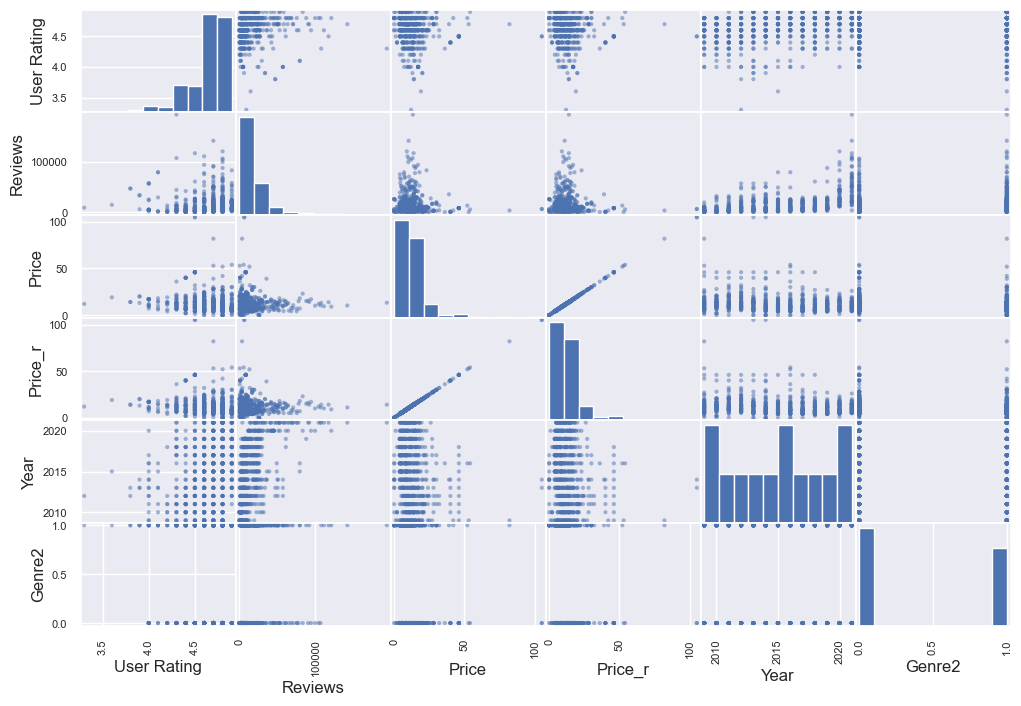

In [63]:
from pandas.plotting import scatter_matrix
#son muchas graficas porque son 13x13 figuras

scatter_matrix(books,figsize=(12,8)); #El punto y coma sirve para que no salga la infromaxión textual de matplotlib-pandas

In this pairplot not much information can be extracted. It is clear that the variables **Price** and **Price_r** have a similar behavior since they represent practically the same thing.

**DataFrame with new Overall rating variables**

In [64]:
selected_columns=["Overall Rating","Overall Rating2", "Overall Rating3", "User Rating", "Reviews","Count","Price","Genre2"]
df2[selected_columns].corr()

Overall Rating  Overall Rating2  Overall Rating3  \
Overall Rating         1.000000         0.997501         0.613755   
Overall Rating2        0.997501         1.000000         0.619441   
Overall Rating3        0.613755         0.619441         1.000000   
User Rating            0.151582         0.160709         0.386643   
Reviews                0.638980         0.631730         0.019936   
Count                  0.618618         0.611845         0.877470   
Price                 -0.073502        -0.110758        -0.070271   
Genre2                 0.244063         0.251373         0.213190   

                 User Rating   Reviews     Count     Price    Genre2  
Overall Rating      0.151582  0.638980  0.618618 -0.073502  0.244063  
Overall Rating2     0.160709  0.631730  0.611845 -0.110758  0.251373  
Overall Rating3     0.386643  0.019936  0.877470 -0.070271  0.213190  
User Rating         1.000000  0.024958  0.105483 -0.034705 -0.007268  
Reviews             0.024958  1.000000  0.005974 -0.037361  0.235103  
Count               0.105483  0.005974  1.000000 -0.006386  0.157662  
Price              -0.034705 -0.037361 -0.006386  1.000000 -0.154974  
Genre2             -0.007268  0.235103  0.157662 -0.154974  1.000000

With the artifical ratings we generated, we can see much higher correlations between the variables. For example, Reviews and Overall Rating have a correlation of 0.63

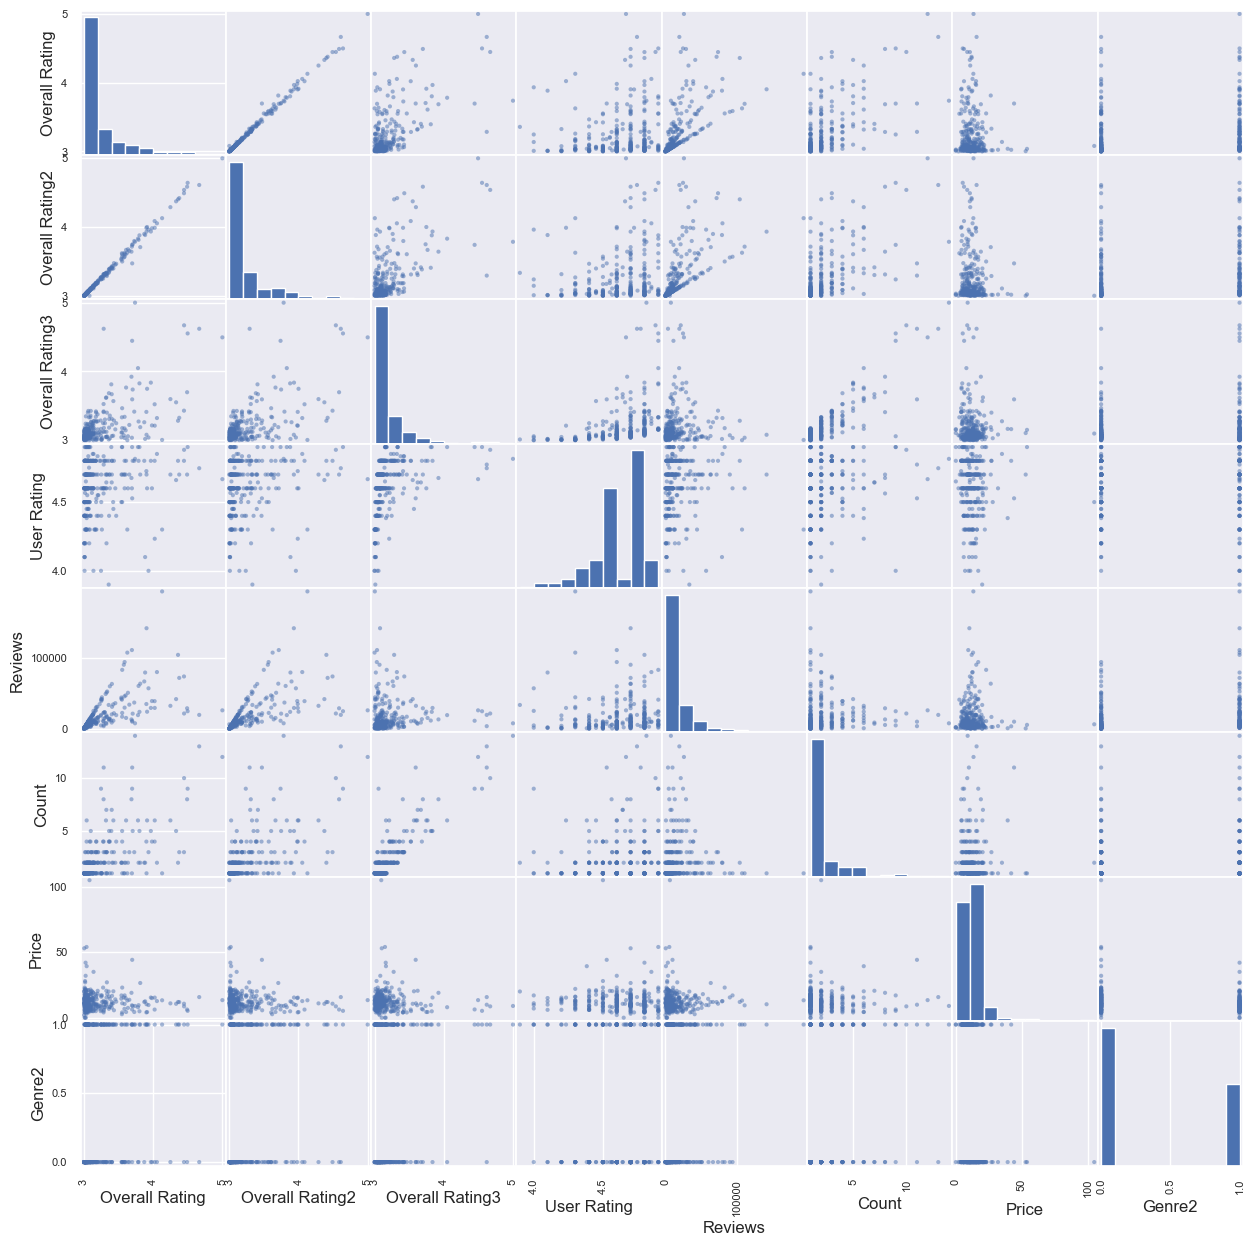

In [65]:
scatter_matrix(df2[selected_columns],figsize=(15,15));

In this pairplot you can see two relevant things:
+ Both **Overall Rating** and **Overall Rating2** make an almost linear trend for Reviews
+ **Overall Rating** vs **Overall Rating2** have a linear behavior

<AxesSubplot:>

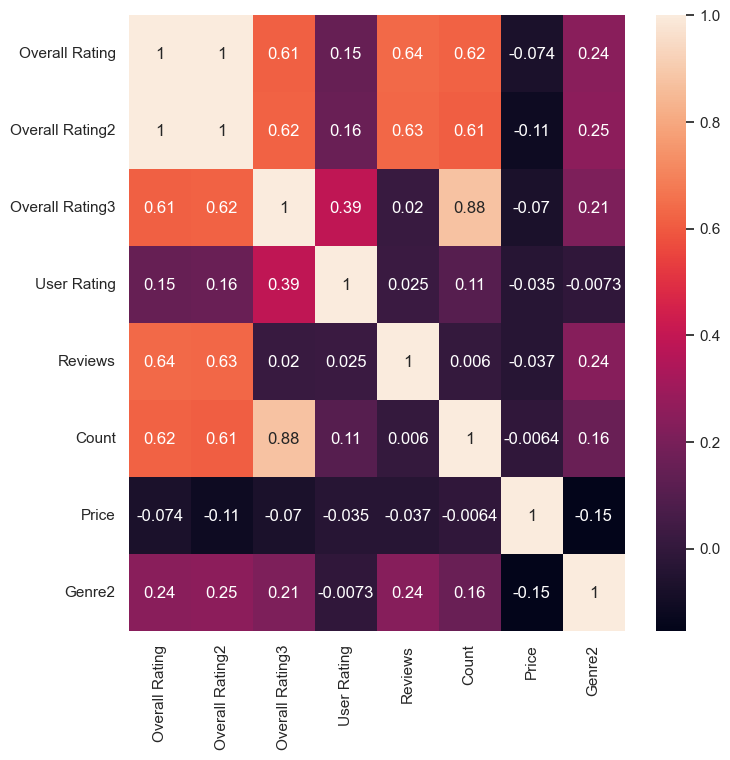

In [66]:
plt.figure(figsize=(8,8))
sns.heatmap(df2[selected_columns].corr(),annot=True)

From this correlation matrix it can be seen that **Count** and **Overall Rating3** are highly correlated

## Possible models
- Linear regression to predict the Overall Rating of an Author
- Logistic regression to predict whether a book is fiction or non-fiction based on its characteristics

### LINEAR REGRESSION

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
selected_columns=[ "Reviews","Count","Price","Genre2"]
X_train,X_test,y_train,y_test=train_test_split(df2[selected_columns],df2["Overall Rating2"],test_size=0.2,random_state=42)

Overall Rating    1.000000
Reviews           0.651869
Count             0.562622
Genre2            0.257262
Price            -0.128257
Name: Overall Rating, dtype: float64


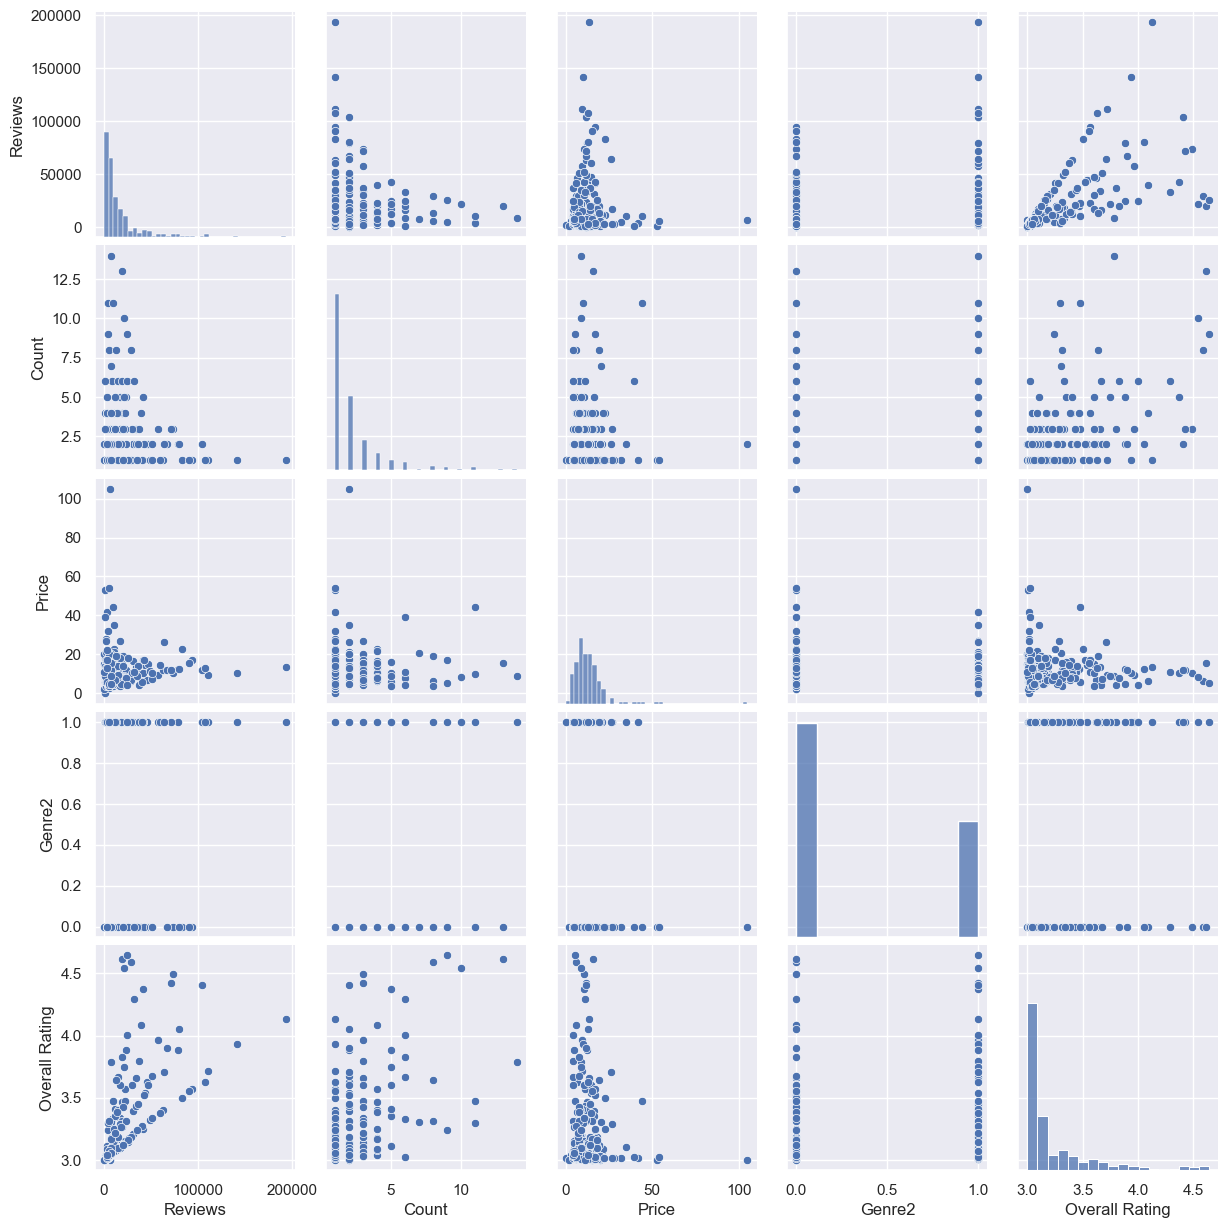

In [69]:
X_train_1=X_train.copy()
X_train_1["Overall Rating"]=y_train
print(X_train_1.corr()["Overall Rating"].sort_values(ascending=False))
sns.pairplot(pd.DataFrame(X_train_1))

Pairplot of the training set we have taken.

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
lrg=LinearRegression()
lrg.fit(X_train,y_train)

LinearRegression()

In [72]:
from sklearn.metrics import mean_squared_error

In [75]:
lrg_pred=lrg.predict(X_test)
error=np.sqrt(mean_squared_error(y_test,lrg_pred))
print("Error medio cuadrático de la predicción en test:" ,error)

Error medio cuadrático de la predicción en test: 0.14939187871099502


The MSE is quite good since it is a value very close to 0 which would be the best.

In [76]:
df_pred=pd.DataFrame(lrg_pred,columns=['prediction'],index=y_test.index)
df_pred['real']=y_test
df_pred['delta']=df_pred['real']-df_pred['prediction']
df_pred["% Relative Error"]=df_pred["delta"]*100/df_pred["real"]
print("El error relativo medio en las prediciones", df_pred["% Relative Error"].mean())
df_pred.head(5)

El error relativo medio en las prediciones 0.14146496835320116


prediction      real     delta  % Relative Error
Author                                                               
Glenn Beck             3.181845  3.015749 -0.166096         -5.507611
The Washington Post    2.996980  3.016055  0.019075          0.632452
Amelia Hepworth        3.480894  3.619256  0.138362          3.822947
Sheryl Sandberg        3.105917  3.048628 -0.057289         -1.879163
Andy Weir              3.347915  3.266738 -0.081177         -2.484956

We analyze if there are negative values in the prediction. everyone should be positive

In [77]:
(df_pred['prediction']<0).value_counts()

False    59
Name: prediction, dtype: int64

We also check if all values are between 3 and 5

In [82]:
df_pred.loc[(df_pred['prediction']<3) | (df_pred['prediction'] >5)].value_counts().sum()

8

In [83]:
df_pred.loc[(df_pred['prediction']<3) | (df_pred['prediction'] >5)]

prediction      real     delta  % Relative Error
Author                                                               
The Washington Post    2.996980  3.016055  0.019075          0.632452
Tucker Carlson         2.993862  3.023115  0.029254          0.967662
Jon Meacham            2.950789  3.008862  0.058073          1.930071
Mike Moreno            2.958062  3.010559  0.052497          1.743760
Mark Twain             2.969228  3.001145  0.031916          1.063476
W. Cleon Skousen       2.987175  3.009658  0.022482          0.747008
Mark Hyman M.D.        2.981189  3.008556  0.027367          0.909650
Angie Grace            2.992781  3.010664  0.017883          0.594005

There are eight predictions under 3, so we can improve the model by postprocessing the predictions and adjusting them to the scale.

In [84]:
df_pred.loc[(df_pred['prediction']<3)] = 3

In [86]:
error=np.sqrt(mean_squared_error(y_test,df_pred['prediction']))
print("Error medio cuadrático de la predicción en test:" ,error)

Error medio cuadrático de la predicción en test: 0.148898824260781


The MSE was only reduced by 0.001, but our model is now a bit more precise

### LOGISTIC REGRESSION

+ Predicting whether a book is fiction or non fiction.

First of all we are going to see which of the Overall Rating variables has the most relationship with the genre.

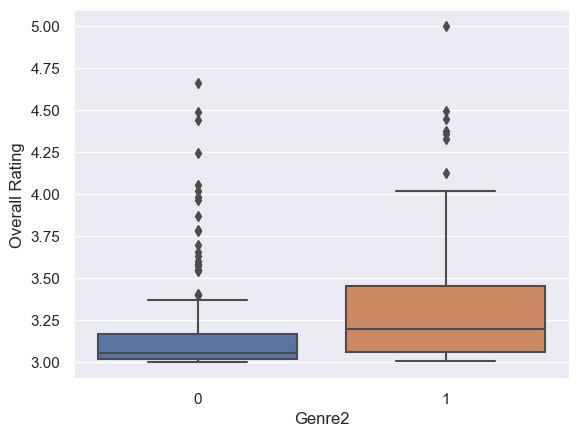

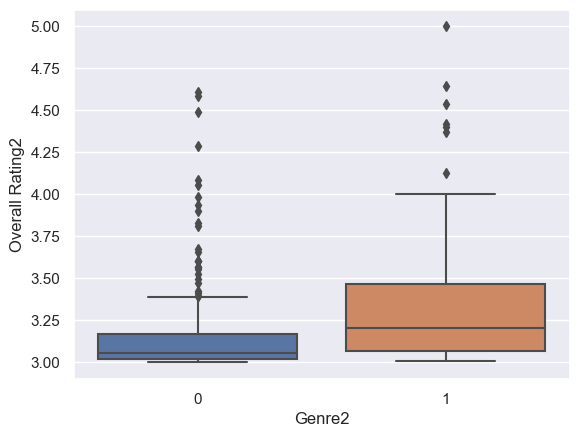

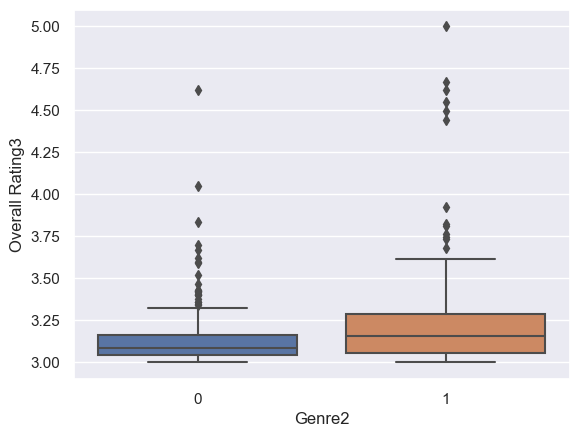

In [88]:
for i in ['Overall Rating','Overall Rating2','Overall Rating3']:
    sns.boxplot(data = df2,x='Genre2',y=i)
    plt.show()

Overall Rating and Overall Rating2 explain the Genre better than Overall Rating3. Since they have such similar boxplots, we will randomly choose Overall rating2 to make the predictions.

In [89]:
selected_columns_2=[ "Reviews","Count",'Price',"Overall Rating2"]
X_train_LR,X_test_LR,y_train_LR,y_test_LR=train_test_split(df2[selected_columns],df2["Genre2"],test_size=0.2,random_state=42)
y_test_LR.head()

Author
Glenn Beck             0
The Washington Post    0
Amelia Hepworth        1
Sheryl Sandberg        0
Andy Weir              1
Name: Genre2, dtype: int64

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
lgr = LogisticRegression()
lgr.fit(X_train_LR,y_train_LR)

LogisticRegression()

In [98]:
lgr_pred=lgr.predict(X_test_LR)

In [93]:
from sklearn.metrics import confusion_matrix

In [106]:
cm = confusion_matrix(y_test_LR,lrg_pred)
cm

array([[29,  3],
       [23,  4]], dtype=int64)

From the confusion matrix we can tell that the model tends to predict non fiction (0).

In [105]:
#accuracy
acc = (cm[0,0]+cm[1,1])/(cm.sum().sum())
print("The model has a test accuracy of:",acc)

The model has a test accuracy of: 0.559322033898305


### CONFIDENCE INTERVAL FOR THE MEAN PRICE

In [98]:
Df_Price = books['Price']
CI_Price=stats.t.interval(confidence=0.95, df=len(Df_Price)-1, loc=np.mean(Df_Price), scale=stats.sem(Df_Price))
print('The confidence interval (95%) for the price is: ', CI_Price)



The confidence interval (95%) for teh price is:  (11.980386127906186, 13.547952333632274)


## Rechazar hipotesis alternativa


Queremos comprobar si una media de 15 euros no seria una sorpresa

In [53]:
mu0 = df2['Price'].mean()
print(mu0)
n = 100
barX = 15.5
s = df2['Price'].std()

Zscore = (barX - mu0)/(s/np.sqrt(n))
print("The Z score for this sample is {:.4}".format(Zscore))

pValue = stats.norm.sf(Zscore)
print("And the resulting p-value is: {:.4}".format(pValue))

12.818539354481137
The Z score for this sample is 3.004
And the resulting p-value is: 0.00133


Vemos que si seria una sorpresa porque solo pasaria el 0.13% de las ocasiones.